<a href="https://colab.research.google.com/github/FuturisticLover123/learning/blob/main/DataAnalys/lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛБ00. Оценка курсов валют USD, EUR
- 10-фев-2025
- 3 курс, 5(в) группа

In [1]:
# %pip install xlrd (для чтения xls таблиц)
# %pip install scikit-learn (для установки sklearn)
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.linear_model import LinearRegression

## 0. Загрузка данных

### 0.1 Загрузка из Excel таблицы

In [ ]:
currencies = pd.read_excel("data/2024_day_ru.xls", sheet_name="curr")
currencies['date'] = pd.to_datetime(currencies['date'])
currencies = currencies.set_index(['date'])
usd = currencies.drop(['eur'], axis=1)
eur = currencies.drop(['usd'], axis=1)
print(currencies.info())
currencies

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   usd     366 non-null    float64
 1   eur     366 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB
None


,usd,eur
date,,
2024-01-01,3.1775,3.5363
2024-01-02,3.1775,3.5363
2024-01-03,3.1775,3.5363
2024-01-04,3.1932,3.4919
2024-01-05,3.1980,3.5075
...,...,...
2024-12-27,3.4070,3.5429
2024-12-28,3.4070,3.5429
2024-12-29,3.4070,3.5429


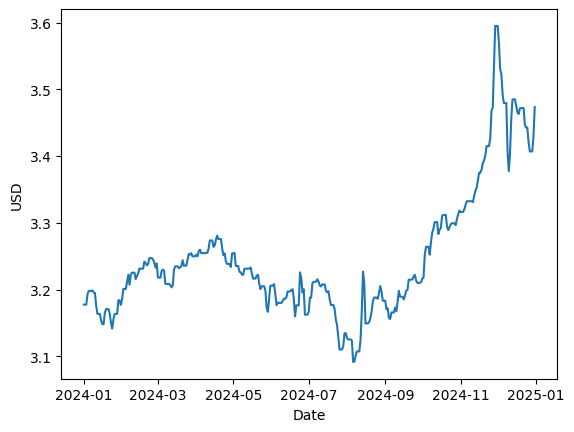

In [ ]:
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(usd)
plt.show()

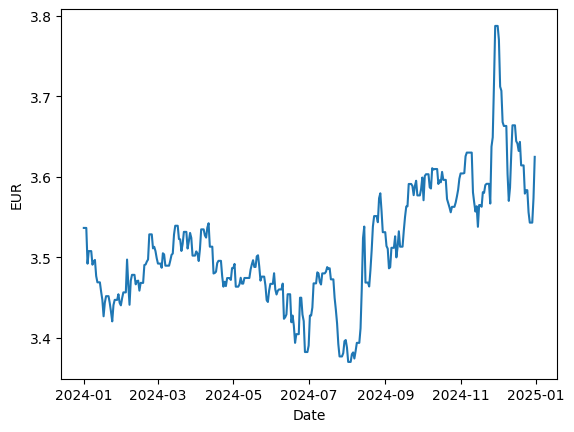

In [ ]:
plt.xlabel('Date')
plt.ylabel('EUR')
plt.plot(eur)
plt.show()

### 0.2 При помощи API `api.nbrb.by`

#### Загрузка курса евро (EUR)

In [ ]:
curr_id=451
request = f'https://api.nbrb.by/ExRates/Rates/Dynamics/{curr_id}?startDate=2024-01-01&endDate=2024-12-31'
response = requests.get(request)
assert response != 200, f'ERROR: {response.status_code} - Запрос не выполнен!'
response.json()[:5]

[{'Cur_ID': 451, 'Date': '2024-01-01T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-02T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-03T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-04T00:00:00', 'Cur_OfficialRate': 3.4919},
 {'Cur_ID': 451, 'Date': '2024-01-05T00:00:00', 'Cur_OfficialRate': 3.5075}]

In [ ]:
eur = pd.read_json(response.text)
eur = eur.drop(['Cur_ID'], axis=1)
eur = eur.rename(columns={'Date':'date', 'Cur_OfficialRate':'eur'})
eur = eur.set_index(['date'])
eur

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_8396\1265613904.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  eur = pd.read_json(response.text)


,eur
date,
2024-01-01,3.5363
2024-01-02,3.5363
2024-01-03,3.5363
2024-01-04,3.4919
2024-01-05,3.5075
...,...
2024-12-26,3.5558
2024-12-27,3.5429
2024-12-28,3.5429


#### Загрузка курса доллара (USD)

In [ ]:
curr_id=431
request = f'https://api.nbrb.by/ExRates/Rates/Dynamics/{curr_id}?startDate=2024-01-01&endDate=2024-12-31'
response = requests.get(request)
assert response != 200, f'ERROR: {response.status_code} - Запрос не выполнен!'
response.json()[:5]

[{'Cur_ID': 431, 'Date': '2024-01-01T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-02T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-03T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-04T00:00:00', 'Cur_OfficialRate': 3.1932},
 {'Cur_ID': 431, 'Date': '2024-01-05T00:00:00', 'Cur_OfficialRate': 3.198}]

In [ ]:
usd = pd.read_json(response.text)
usd = usd.drop(['Cur_ID'], axis=1)
usd = usd.rename(columns={'Date':'date', 'Cur_OfficialRate':'usd'})
usd = usd.set_index(['date'])
usd

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_8396\424052010.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  usd = pd.read_json(response.text)


,usd
date,
2024-01-01,3.1775
2024-01-02,3.1775
2024-01-03,3.1775
2024-01-04,3.1932
2024-01-05,3.1980
...,...
2024-12-26,3.4216
2024-12-27,3.4070
2024-12-28,3.4070


## 1. Вычисление основных статистик

### Доллар США (USD)

In [ ]:
# Вычисление статистик
mean_value = usd["usd"].mean()
median_value = usd["usd"].median()
std_dev = usd["usd"].std()
variance = usd["usd"].var()

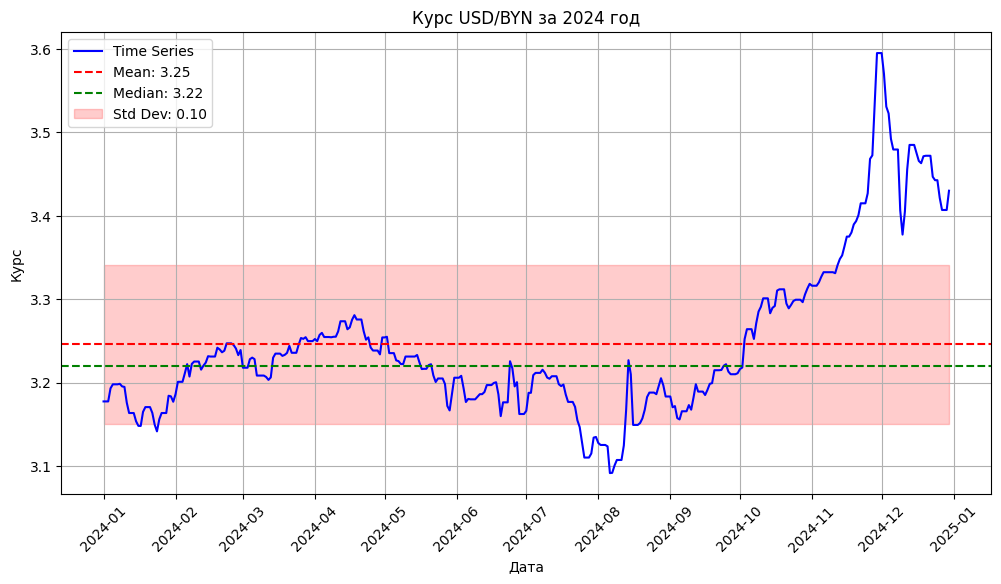

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(x=usd.index, y=usd['usd'], label="Time Series", color="blue")
plt.axhline(mean_value, color="red", linestyle="--", label=f"Mean: {mean_value:.2f}")
plt.axhline(median_value, color="green", linestyle="--", label=f"Median: {median_value:.2f}")
plt.fill_between(usd.index, mean_value - std_dev, mean_value + std_dev, color='red', alpha=0.2, label=f"Std Dev: {std_dev:.2f}")

# Настройка оси X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

# Подписи
plt.title("Курс USD/BYN за 2024 год")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.legend()
plt.grid()
plt.show()

### Евро (EUR)

In [ ]:
# Вычисление статистик
mean_value = eur["eur"].mean()
median_value = eur["eur"].median()
std_dev = eur["eur"].std()
variance = eur["eur"].var()

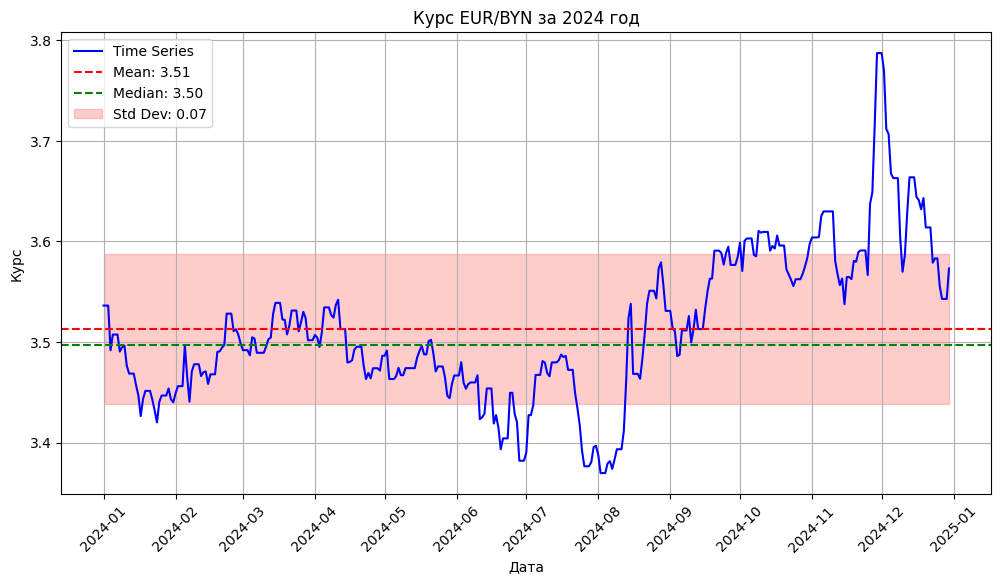

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(x=eur.index, y=eur['eur'], label="Time Series", color="blue")
plt.axhline(mean_value, color="red", linestyle="--", label=f"Mean: {mean_value:.2f}")
plt.axhline(median_value, color="green", linestyle="--", label=f"Median: {median_value:.2f}")
plt.fill_between(eur.index, mean_value - std_dev, mean_value + std_dev, color='red', alpha=0.2, label=f"Std Dev: {std_dev:.2f}")

# Настройка оси X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

# Подписи
plt.title("Курс EUR/BYN за 2024 год")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.legend()
plt.grid()
plt.show()

## 2. Сглаживание при помощи hp-filter

### Евро (EUR)

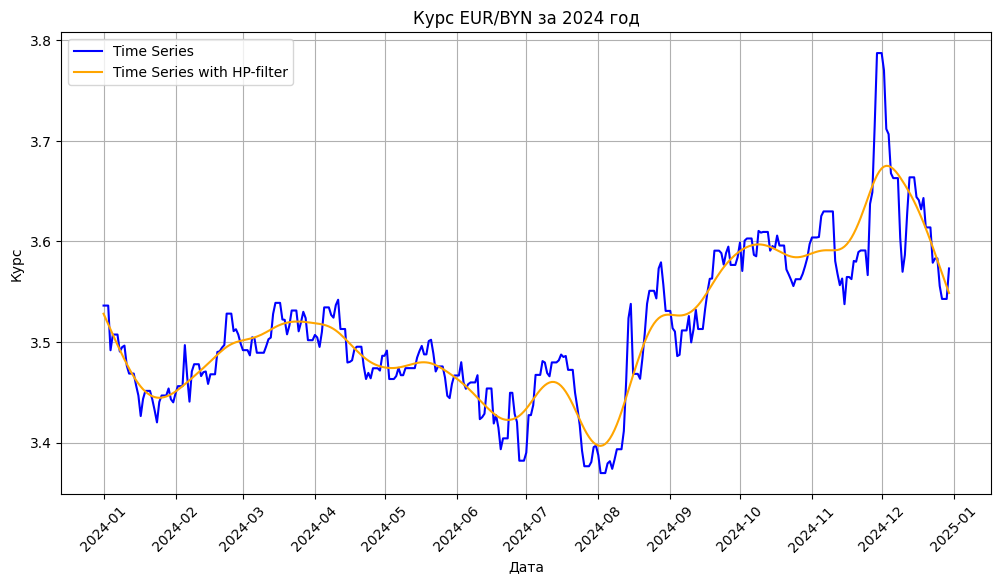

In [ ]:
# Применение фильтра
cycle, trend = hpfilter(eur, 1600)

# Отображение исходного и сглаженного рядов
plt.figure(figsize=(12, 6))
sns.lineplot(x=eur.index, y=eur['eur'], label="Time Series", color="blue")
sns.lineplot(x=eur.index, y=trend, label="Time Series with HP-filter", color="orange")

# Настройка оси X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

# Подписи|
plt.title("Курс EUR/BYN за 2024 год")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.legend()
plt.grid()
plt.show()

### Доллар США (USD)

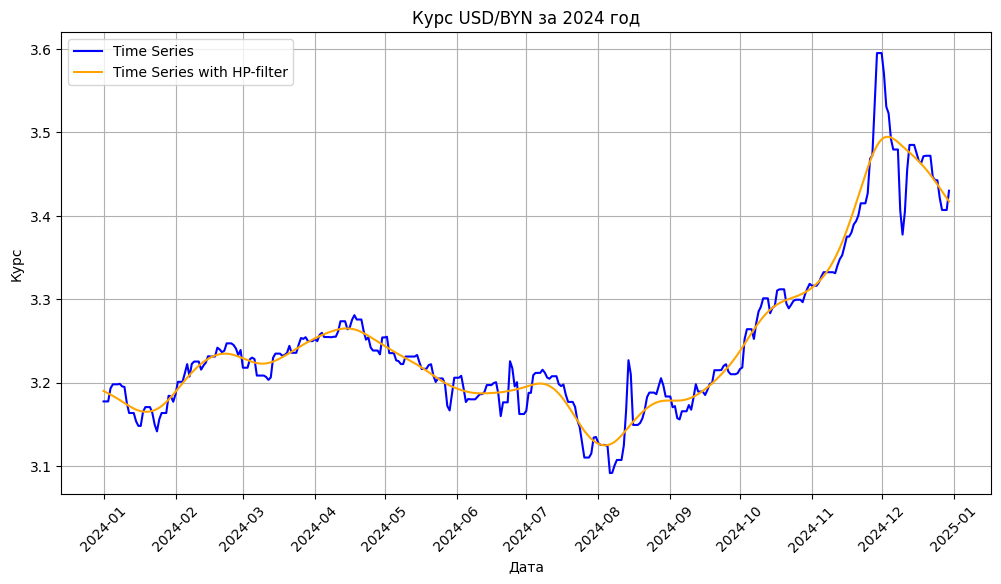

In [ ]:
# Применение фильтра
cycle, trend = hpfilter(usd, 1600)

# Отображение исходного и сглаженного рядов
plt.figure(figsize=(12, 6))
sns.lineplot(x=usd.index, y=usd['usd'], label="Time Series", color="blue")
sns.lineplot(x=usd.index, y=trend, label="Time Series with HP-filter", color="orange")

# Настройка оси X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

# Подписи
plt.title("Курс USD/BYN за 2024 год")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.legend()
plt.grid()
plt.show()

## 3. Корреляция между курсами USD и EUR

In [ ]:
curr = pd.DataFrame()
curr['usd'] = usd['usd']
curr['eur'] = eur['eur']
curr

,usd,eur
date,,
2024-01-01,3.1775,3.5363
2024-01-02,3.1775,3.5363
2024-01-03,3.1775,3.5363
2024-01-04,3.1932,3.4919
2024-01-05,3.1980,3.5075
...,...,...
2024-12-26,3.4216,3.5558
2024-12-27,3.4070,3.5429
2024-12-28,3.4070,3.5429


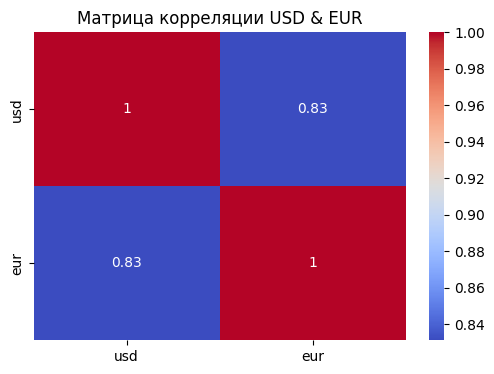

In [ ]:
# Матрица корреляции
plt.figure(figsize=(6, 4))
sns.heatmap(curr[['usd','eur']].corr(), annot=True, cmap="coolwarm")
plt.title("Матрица корреляции USD & EUR")
plt.show()

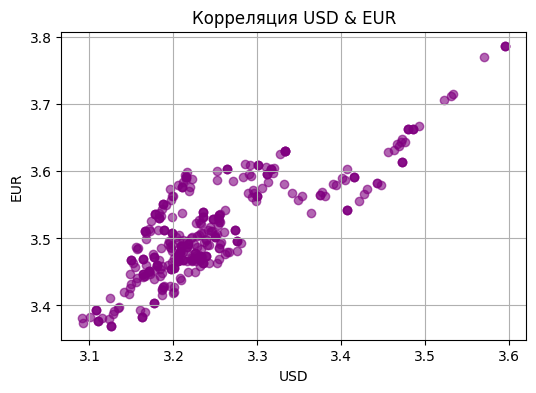

In [ ]:
# Визуализация корреляции
plt.figure(figsize=(6, 4))
plt.scatter(curr["usd"], curr["eur"], alpha=0.6, color='purple')

plt.xlabel("USD")
plt.ylabel("EUR")
plt.title("Корреляция USD & EUR")
plt.grid()
plt.show()


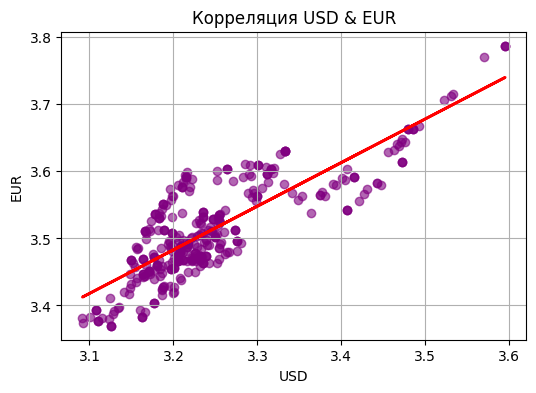

In [ ]:
# Добавляем линейную регрессию
plt.figure(figsize=(6, 4))
plt.scatter(curr["usd"], curr["eur"], alpha=0.6, color='purple')

X = curr['usd'].values.reshape(-1, 1)
y = curr['eur'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel("USD")
plt.ylabel("EUR")
plt.title("Корреляция USD & EUR")
plt.grid()
plt.show()

## 4. Разность рядов

In [ ]:
curr['diff'] = curr['eur'] - curr['usd']
curr

,usd,eur,diff
date,,,
2024-01-01,3.1775,3.5363,0.3588
2024-01-02,3.1775,3.5363,0.3588
2024-01-03,3.1775,3.5363,0.3588
2024-01-04,3.1932,3.4919,0.2987
2024-01-05,3.1980,3.5075,0.3095
...,...,...,...
2024-12-26,3.4216,3.5558,0.1342
2024-12-27,3.4070,3.5429,0.1359
2024-12-28,3.4070,3.5429,0.1359


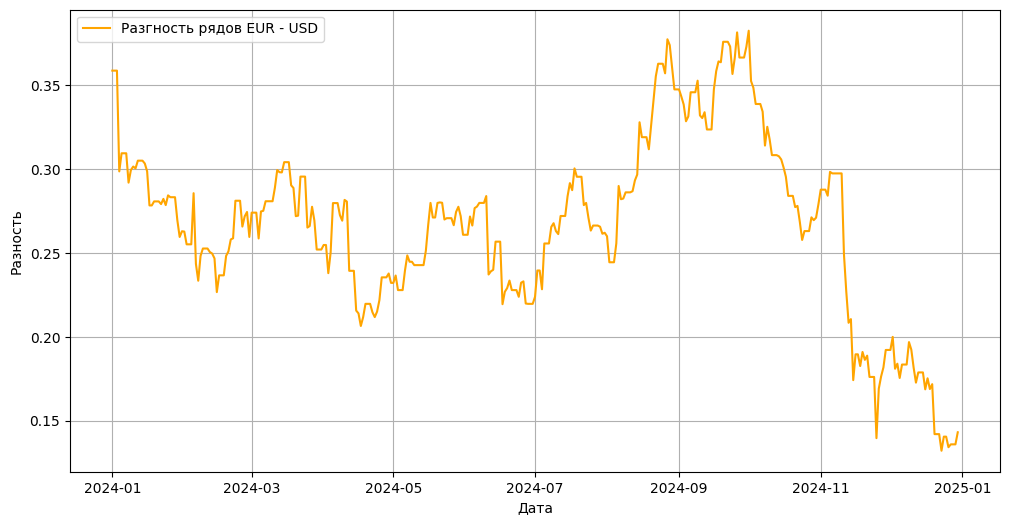

In [ ]:
# Визуализация разности рядов
# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(x=curr.index, y=curr['diff'], label="Разгность рядов EUR - USD", color="orange")
plt.xlabel("Дата")
plt.ylabel("Разность")
plt.grid()
plt.show()